In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from matplotlib import gridspec
import random 
import statsmodels.formula.api as smf
from time import process_time
import statsmodels.api as sm

#### Necesitas estas librerías!
### Elephant --> https://elephant.readthedocs.io/en/latest/tutorials/statistics.html
### neo --> https://neo.readthedocs.io/en/stable/install.html

from neo.core import SpikeTrain
from quantities import ms, s, Hz
from elephant.statistics import mean_firing_rate
from elephant.statistics import time_histogram, instantaneous_rate
from elephant.kernels import GaussianKernel
from elephant.statistics import mean_firing_rate

import os 
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from pylab import *
import scipy.io as sio
import warnings
warnings. filterwarnings('ignore', category=UserWarning)

%matplotlib inline
rcParams['figure.figsize']=(12,3)  # Change the default figure size

# ... and notebook specific modules
from scipy.stats import gamma 
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
utilities = 'G:/Mi unidad/WORKING_MEMORY/PAPER/WM_manuscript_FIGURES/'
os.chdir(utilities)
import functions as plots

save_path = 'G:/Mi unidad/WORKING_MEMORY/PAPER/WM_manuscript_FIGURES/Fig. 7. Synch/'
path = 'G:/Mi unidad/WORKING_MEMORY/PAPER/ANALYSIS_figures/'
os.chdir(save_path)

In [50]:
sns.set_context('paper', rc={'axes.labelsize': 7,
                            'lines.linewidth': 1, 
                            'lines.markersize': 3, 
                            'legend.fontsize': 6,  
                            'xtick.major.size': 1,
                            'xtick.labelsize': 6, 
                            'ytick.major.size': 1, 
                            'ytick.labelsize': 6,
                            'xtick.major.pad': 0,
                            'ytick.major.pad': 0,
                            'xlabel.labelpad': -10})


Text(0.5, 1.0, 'MUA Autocorr.')

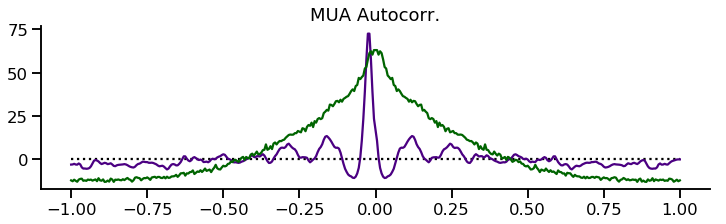

In [9]:
file_name = 'auto_corrs_indiv_session'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)

df['mean'] = df.mean(axis=1)
plt.plot(df.index,df['mean'], color='indigo')

file_name = 'indiv_sess_auto_corrs_WM_phases'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)

df['mean'] = df.mean(axis=1)
plt.plot(df.index,df['mean'], color='darkgreen')

plt.hlines(xmin=-1, xmax=1, y=0, linestyle=':')
sns.despine()
plt.title('MUA Autocorr.')

Text(0, 0.5, 'RepL - WM')

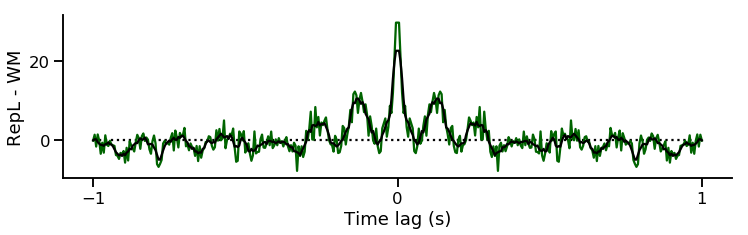

In [44]:
from scipy.signal import savgol_filter

file_name = 'indiv_sess_auto_corrs_REPLapses'
df_rep = pd.read_csv(file_name+'.csv', header=None, index_col=0)
df_rep['mean'] = df_rep.mean(axis=1)

file_name = 'indiv_sess_auto_corrs_WM_phases'
df_wm = pd.read_csv(file_name+'.csv', header=None, index_col=0)
df_wm['mean'] = df_wm.mean(axis=1)
x= df_wm.index
y= df_rep['mean']-df_wm['mean']

plt.plot(x,y, color='darkgreen')

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

y = smooth(y,5)
plt.plot(x,y, color='black')

plt.hlines(xmin=-1, xmax=1, y=0, linestyle=':')
sns.despine()
plt.locator_params(nbins=3) 
plt.xlabel('Time lag (s)')
plt.ylabel('RepL - WM')


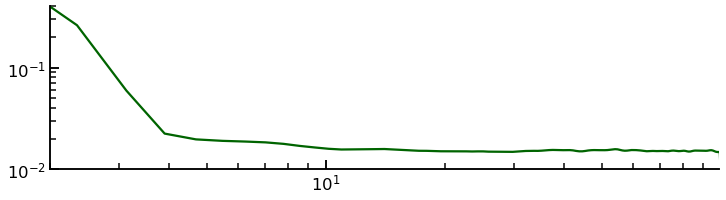

In [10]:
file_name = 'psd_ratio_indiv_session'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y= df.mean(axis=1)
plt.plot(x, y, color='indigo')

file_name = 'indiv_sess_PSD_WM_phases'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y= df.mean(axis=1)
plt.plot(x, y, color='darkgreen')

plt.yscale('log')
plt.xscale('log')
plt.xlim(2,99)
plt.tick_params(axis="both", which='both',direction="in")
plt.ylim(0.01,0.4)
sns.despine()

c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


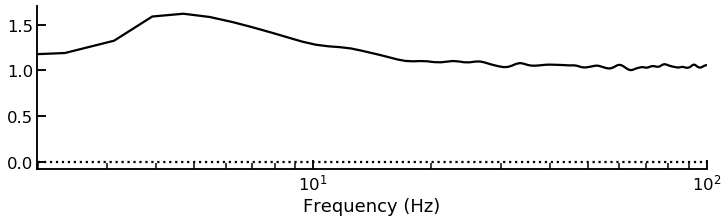

In [12]:
file_name = 'indiv_sess_PSD_REPLapses'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y_R= df.mean(axis=1)

file_name = 'indiv_sess_PSD_WM_phases'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y_W= df.mean(axis=1)

y = y_R - y_W 

plt.plot(x, y, color='black')

plt.yscale('linear')
plt.xscale('log')
plt.xlim(1.99,100)
plt.hlines(xmin=2, xmax=100, y=0, linestyle=':')
plt.tick_params(axis="both", which='both',direction="in")
plt.xlabel('Frequency (Hz)')
sns.despine()

#### Revision after finding issue with the parsing of the data

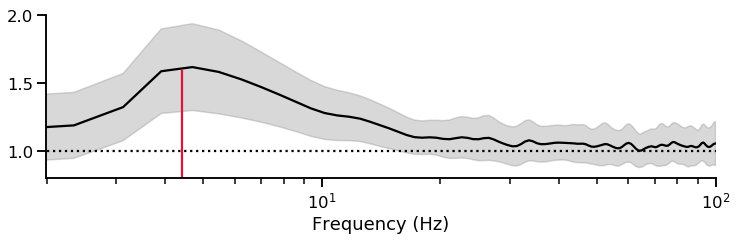

In [40]:
file_name = 'AVG_psd_ratio_w_band'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y= df[1]
y_min=df[3]
y_max=df[2]
plt.plot(x, y, color='black')

plt.yscale('linear')
plt.xscale('log')
plt.xlim(1.99,100)
plt.ylim(0.8,2)
plt.hlines(xmin=2, xmax=100, y=1, linestyle=':')
plt.vlines(ymin=0, ymax=1.6, x=4.4, color='crimson')
plt.fill_between(x, y_min, y_max, color='gray', alpha=0.3, label='Error Band')

plt.tick_params(axis="both", which='both',direction="out")
plt.xlabel('Frequency (Hz)')
sns.despine()

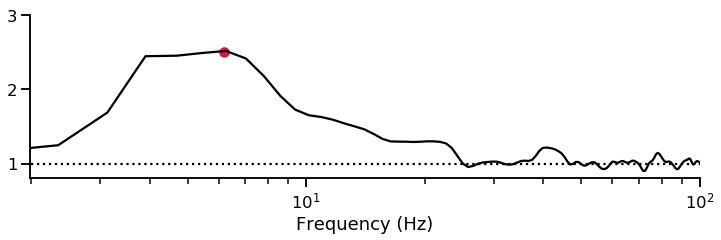

In [49]:
file_name = 'psd_ratio_indiv_session'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y= df[1]

plt.scatter(x=6.2, y=2.5, color='crimson')
plt.plot(x, y, color='black')
plt.yscale('linear')
plt.xscale('log')
plt.xlim(1.99,100)
plt.ylim(0.8,3)
plt.hlines(xmin=2, xmax=100, y=1, linestyle=':')

plt.tick_params(axis="both", which='both',direction="out")
plt.xlabel('Frequency (Hz)')
sns.despine()

c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Tiffany\Anaconda3\envs\envr\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0.5, 1.0, 'MUA Autocorr.')

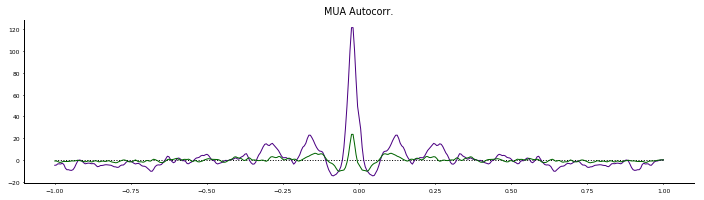

In [54]:
file_name = 'auto_corrs_indiv_session'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)

plt.plot(df.index,df[1], color='indigo')
plt.plot(df.index,df[2], color='darkgreen')

plt.hlines(xmin=-1, xmax=1, y=0, linestyle=':')
sns.despine()
plt.title('MUA Autocorr.')

In [60]:
df

,1,2
0,,
0.00000,0.891810,0.889690
0.78125,1.455500,1.451700
1.56250,0.778470,0.775700
2.34380,0.262590,0.260830
3.12500,0.060817,0.059464
...,...,...
96.87500,0.015357,0.014929
97.65600,0.015207,0.014829
98.43800,0.015106,0.014818


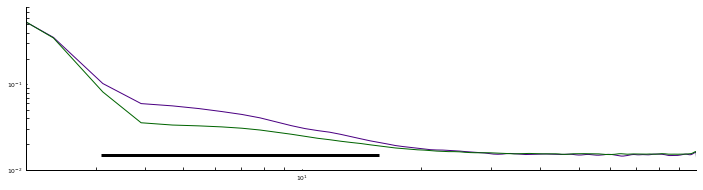

In [77]:
file_name = 'avg_PSDs_V2'
df = pd.read_csv(file_name+'.csv', header=None, index_col=0)
x=df.index
y= df[1]
plt.plot(x, y, color='indigo')

x=df.index
y= df[2]
plt.plot(x, y, color='darkgreen')

plt.yscale('log')
plt.xscale('log')
plt.xlim(2,99)
plt.tick_params(axis="both", which='both',direction="in")
plt.ylim(0.01,0.8)
plt.hlines(xmin=3.1, xmax=15.6, y=0.015, linewidth=3)
sns.despine()

In [79]:
save_path = 'G:/Mi unidad/WORKING_MEMORY/PAPER/ANALYSIS_Figures/'
os.chdir(save_path)
file_name = 'instantaneous firing rate_alltrial_5ms'
df_final = pd.read_csv(file_name+'.csv')